# Case study

This database contains over 2,500 chocolate bar ratings from around the globe!

Each chocolate is evaluated from a combination of both objective qualities and subjective interpretation. A rating here only represents an experience with one bar from one batch. Batch numbers, vintages and review dates are included in the database when known.

link to dataset - https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings
##### Flavors of Cacao Rating System:

4.0 - 5.0 = Outstanding

3.5 - 3.9 = Highly Recommended

3.0 - 3.49 = Recommended

2.0 - 2.9 = Disappointing

1.0 - 1.9 = Unpleasant

##### Note to theingredients column:

B (Beans), S (Sugar), S* (Sweetener other than sugar or beet sugar), C (Cocoa Butter), (V) Vanilla, (L) Lecithin, Sa (Salt)

###### Analysis ideas

Which countries of bean origin results in the highest rating?

Does cocoa percentage or ingredients affect the rating?

With these high rates, what are the most memorable characteristics?


## Content

1) Importing libraries

2) Writing the initial analysis which I learnt from the dataset

3) reading the data

4) performing EDA on the data set 

5) treating null values

6) Correlation analysis

7) Checking for outliers

8) Data cleaning

9) Visualising the dataset

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import re

#### Initial Analysis from the dataset

1) which Manufacturer produces the most number of chocolates

2) which country produces the highest bars

3) On which year most number of bars were reviewed

4) Highest cocoa percentage in which bar

5) Cocoa percentage nad ingridients effect on the ratings

6) Detecting outliers

7) checking for outliers

8) Checking for correlations

## Data
Reading the data from the csv file

In [2]:
df=pd.read_csv('chocolate_bars.csv',encoding= 'unicode_escape')
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


# Explanatory Data Analysis
Lets begin EDA ,we start by checking out the columns present

In [3]:
#Getting the size of the dataset
df.shape

(2530, 11)

In [4]:
#Getting the infos on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


## Treating Null Values

In [5]:
#Checking for the null values
df.isnull().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [6]:
df.isnull().sum() * 100 / len(df)

id                  0.000000
manufacturer        0.000000
company_location    0.000000
year_reviewed       0.000000
bean_origin         0.000000
bar_name            0.000000
cocoa_percent       0.000000
num_ingredients     3.438735
ingredients         3.438735
review              0.000000
rating              0.000000
dtype: float64

As it has only around 3.5% of null values we will not drop the columns we will just replace the null values


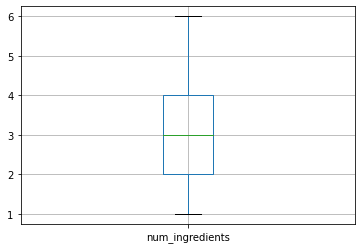

In [7]:
#plotting box plot to detect the ouliers in the data so that we can decide if we will use mean or median to replace the null values
dfnew=df[['num_ingredients']]
#dfnew.head()
for column in dfnew:
    plt.figure()
    df.boxplot([column])

As their are no outliers we can use mean to replace the null values

In [8]:
df.fillna(df.mean(),inplace= True)
df.isnull().sum()

C:\Users\Subhajit_Chandra\AppData\Local\Temp\ipykernel_19400\2495306971.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace= True)


id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients      0
ingredients         87
review               0
rating               0
dtype: int64

In [9]:
#Replacimng the values with no ingredients data in the ingredients column with No ingredients data avalable
df.fillna({'ingredients':'No ingredients data avalable'},inplace=True)
df.isnull().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
dtype: int64

In [10]:
df.head(20)

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80.0,3.0,"B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68.0,3.0,"B,S,C","milk brownie, macadamia,chewy",3.50
7,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,4.0,"B,S,C,L","vegetal, nutty",3.50
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
9,1011,A. Morin,France,2013,Panama,Panama,70.0,4.0,"B,S,C,L","brief fruit note, earthy, nutty",2.75


## Corelation Analysis


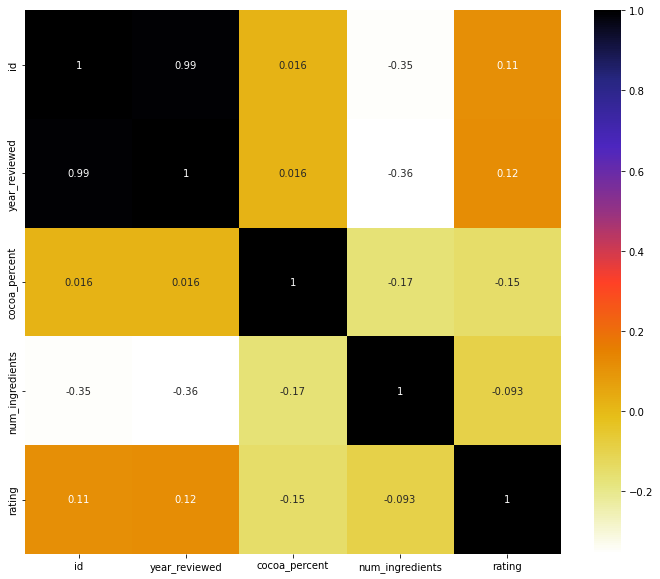

In [11]:
#analysing the datas using heat map for corelation analysis
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

#### Observation
From the above table we see id and year_reviewed are having high correlation but that is not possible because both are totally different so we will kepp both the columns

## Outliers Detection

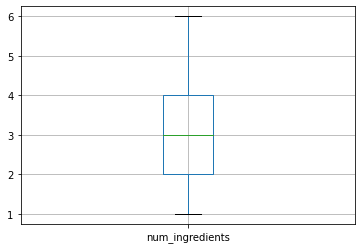

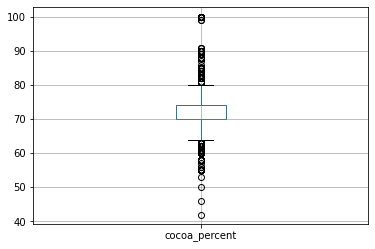

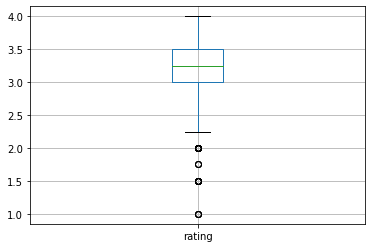

In [12]:
#plotting box plot to detect the ouliers in the data so that we can decide if we will use mean or median to replace the null values
dfnew=df[['num_ingredients','cocoa_percent','rating']]
#dfnew.head()
for column in dfnew:
    plt.figure()
    df.boxplot([column])

#### Observation 
From the above we can see that cocoa percentage and rating column has many outliers now we will detect the outliers

In [13]:
#checking the outlier in the Cocao percent column in the upper quantile
Cocoa_Max=df['cocoa_percent'].quantile(0.95)
Cocoa_Max

80.0

In [14]:
#Displaying all the outliers that are above the upper quantile range
df[df['cocoa_percent']>Cocoa_Max]

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
39,705,Adi aka Fijiana (Easy In Ltd),Fiji,2011,Fiji,Vanua Levu,88.0,3.000000,"B,S,C","orange, floral, lemon",3.50
82,464,Amatller (Simon Coll),Spain,2009,Ecuador,Ecuador,85.0,2.000000,"B,S","fatty, mushroom, off notes",2.75
84,464,Amatller (Simon Coll),Spain,2009,Ghana,Ghana,85.0,2.000000,"B,S","roasty,oddly sweet,marshmallow",3.00
108,572,AMMA,Brazil,2010,Brazil,"Monte Alegre, 3 diff. plantations",85.0,4.000000,"B,S,C,L","creamy, red berry, bitter",2.75
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,3.041343,No ingredients data avalable,"very nutty, very bitter",1.75
...,...,...,...,...,...,...,...,...,...,...,...
2457,1109,Willie's Cacao,U.K.,2013,Indonesia,"Java, Indonesian Black",100.0,3.041343,No ingredients data avalable,"fruit, strong smoke, bitter",2.25
2458,1227,Willie's Cacao,U.K.,2014,Colombia,Los Llanos,88.0,3.000000,"B,S,C","mild nutty and fruit, savory",3.00
2495,1824,Zart Pralinen,Austria,2016,Trinidad,San Juan Estate,85.0,3.000000,"B,S,C","sticky, strong bitter, spice",2.75
2496,1824,Zart Pralinen,Austria,2016,Tanzania,"Kakao Kamili, Kilombero Valley",85.0,3.000000,"B,S,C","melon, mild tart, bitter, fatty",3.00


In [15]:
#checking the outlier in the Cocao percent column in the lower quantile
Cocoa_Min=df['cocoa_percent'].quantile(0.05)
Cocoa_Min

64.0

In [16]:
#Displaying all the outliers that are below the lower quantile range
df[df['cocoa_percent']<Cocoa_Min]

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
8,797,A. Morin,France,2012,Peru,Peru,63.0,4.0,"B,S,C,L","fruity, melon, roasty",3.75
19,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,3.0,"B,S,C","sweet, cocoa, tangerine",4.00
29,1876,A. Morin,France,2016,Sao Tome,Agua Grande,63.0,4.0,"B,S,C,L","sweet, chocolatey, vegetal",3.75
31,2206,A. Morin,France,2018,Peru,Absolu,63.0,4.0,"B,S,C,L","sweet, dairy, spice, cocoa",3.75
37,705,Adi aka Fijiana (Easy In Ltd),Fiji,2011,Fiji,Vanua Levu,60.0,3.0,"B,S,C","sweet, sublte strawberry",2.75
...,...,...,...,...,...,...,...,...,...,...,...
2399,1972,Valrhona,France,2017,Blend,"Oriado, Peru, Dom. Rep",60.0,3.0,"B,S,C","intense, rich, sweet",3.25
2489,1582,Zak's,U.S.A.,2015,Blend,"House Blend, Batch 2",60.0,3.0,"B,S,C","very sweet, heavy roast, nuts",3.00
2511,781,Zotter,Austria,2011,India,Kerala State,62.0,4.0,"B,S*,C,Sa","oily, subdued, caramel, salt",3.25
2522,883,Zotter,Austria,2012,Blend,"Indianer, Raw",58.0,4.0,"B,S*,C,Sa","smooth, spicy, floral",3.50


In [17]:
#checking the outlier in the rating column in the upper quantile
rating_Max=df['rating'].quantile(0.95)
rating_Max

3.75

In [18]:
#Displaying all the outliers that are above the upper quantile range
df[df['rating']>rating_Max]

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
18,1015,A. Morin,France,2013,Venezuela,Chuao,70.0,4.0,"B,S,C,L","oily, nut, caramel, raspberry",4.0
19,1019,A. Morin,France,2013,Peru,Chanchamayo Province,63.0,3.0,"B,S,C","sweet, cocoa, tangerine",4.0
24,1319,A. Morin,France,2014,Peru,Pablino,70.0,4.0,"B,S,C,L","delicate, hazelnut, brownie",4.0
32,2648,A. Morin,France,2021,Mexico,La Joya,70.0,4.0,"B,S,C,L","light color, fruit, yogurt",4.0
79,470,Amano,U.S.A.,2010,Ecuador,Guayas,70.0,4.0,"B,S,C,V","strong spice, intense pepper",4.0
...,...,...,...,...,...,...,...,...,...,...,...
2394,757,Valrhona,France,2011,Venezuela,"Porcelana, Pedegral",64.0,5.0,"B,S,C,V,L","creamy, honey,peanut butter",4.0
2395,931,Valrhona,France,2012,Venezuela,"Otucan, Grand Cru",69.0,5.0,"B,S,C,V,L","green,unripened fruit,banana",4.0
2398,1510,Valrhona,France,2015,Peru,"Piura, Illanka, Quemazon",63.0,5.0,"B,S,C,V,L","intense, dark berry, grapes",4.0
2459,1848,Willie's Cacao,U.K.,2016,Colombia,Los Llanos,70.0,3.0,"B,S,C","rich cocoa, spicy, cinamon",4.0


In [19]:
#checking the outlier in the rating column in the lower quantile
rating_Min=df['rating'].quantile(0.05)
rating_Min

2.5

In [20]:
#Displaying all the outliers that are below the lower quantile range
df[df['rating']<rating_Min]

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
158,363,Artisan du Chocolat,U.K.,2009,Brazil,Brazil Rio Doce,72.0,3.000000,"B,S,C","cocoa, dominate off note",1.75
164,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100.0,3.041343,No ingredients data avalable,"very nutty, very bitter",1.75
212,2374,Bean,U.K.,2019,Peru,Peru,70.0,4.000000,"B,S,C,V","strong vanilla, off notes",2.25
293,81,Bonnat,France,2006,Blend,One Hundred,100.0,3.041343,No ingredients data avalable,"acidic, bitter, dry",1.50
323,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100.0,3.041343,No ingredients data avalable,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...,...
2322,188,Theo,U.S.A.,2007,Venezuela,"Venezuela; Barinos, Merida, Tachron",91.0,2.000000,"B,S","dry, very bland, mild bitter",2.00
2383,147,Valrhona,France,2007,Blend,Le Noir Extra Amer,85.0,5.000000,"B,S,C,V,L","creamy, fatty, very bitter",1.50
2424,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100.0,3.041343,No ingredients data avalable,"bland, mild fruit, strong bitter",2.00
2425,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90.0,3.041343,No ingredients data avalable,"some fruit, strong bitter",2.00


## Data Cleaning 


In [21]:
#For remove any extra spaces in begining or end of string
df['manufacturer'] = df['manufacturer'].str.strip()
df

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [22]:
# knowning the nuber of shows of a bars in the dataset
df["bars_count"]=df["bar_name"].str.split(",").str.len()
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,bars_count
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25,2
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50,2
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75,2
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00,2
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00,2


In [23]:
#Checking if the new column added has any null values or not
df.isnull().sum()

id                  0
manufacturer        0
company_location    0
year_reviewed       0
bean_origin         0
bar_name            0
cocoa_percent       0
num_ingredients     0
ingredients         0
review              0
rating              0
bars_count          0
dtype: int64

## Plotting Graph

In [24]:
#Seeing the top 10 countries manufacturing cocoa
df.company_location.value_counts().head(10)

U.S.A.         1136
Canada          177
France          176
U.K.            133
Italy            78
Belgium          63
Ecuador          58
Australia        53
Switzerland      44
Germany          42
Name: company_location, dtype: int64

([<matplotlib.patches.Wedge at 0x263a2840760>,
 [Text(-0.27219236700487254, 1.0657914032981712, 'U.S.A.'),
  Text(-0.7790633063402621, -0.7765696135660853, 'Canada'),
  Text(-0.2413340673019876, -1.0731998266676528, 'France'),
  Text(0.297735779687671, -1.0589397553656086, 'U.K.'),
  Text(0.6322171208145644, -0.9001674911642514, 'Italy'),
  Text(0.8178523485486912, -0.7356069167520044, 'Belgium'),
  Text(0.9442935986322478, -0.5641893295536168, 'Ecuador'),
  Text(1.0292374611206243, -0.38816265743367384, 'Australia'),
  Text(1.0769300388337644, -0.22410196665247537, 'Switzerland'),
  Text(1.0975083528890113, -0.07399604948137214, 'Germany')],
 [Text(-0.14846856382083956, 0.5813407654353661, '57.96%'),
  Text(-0.42494362164014293, -0.423583425581501, '9.03%'),
  Text(-0.1316367639829023, -0.5853817236369014, '8.98%'),
  Text(0.16240133437509324, -0.5776035029266955, '6.79%'),
  Text(0.3448457022624896, -0.49100044972595525, '3.98%'),
  Text(0.44610128102655877, -0.4012401364101842, '3.2

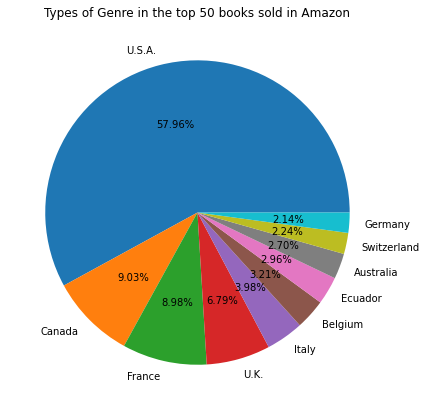

In [25]:
#plotting a pie graph to understand which type of country has manufacturing cocoa
plt.figure(figsize=(12,7))
plt.title('Types of Genre in the top 50 books sold in Amazon')
plt.pie(df.company_location.value_counts().head(10).values,labels=df.company_location.value_counts().head(10).index,autopct='%1.2f%%')

#### Observation
From the above graph it is evident that most of the manufacturing is done in USA it has a huge amount of manufacturing of cocoa units

In [26]:
#Seeing the top 10 Manufactures of cocoa
df.manufacturer.value_counts().head(10)

Soma         56
Fresco       39
Arete        32
Bonnat       30
A. Morin     26
Dandelion    25
Pralus       25
Domori       23
Valrhona     22
Guittard     22
Name: manufacturer, dtype: int64

In [27]:
#Seeing the top 10 most reviewed years of cocoa
year_df=df.year_reviewed.value_counts().reset_index()
year_df

,index,year_reviewed
0,2015,284
1,2014,247
2,2018,228
3,2016,217
4,2012,194
5,2019,193
6,2013,183
7,2021,175
8,2011,163
9,2009,123


<AxesSubplot:title={'center':'Most Reviewed years'}, xlabel='year', ylabel='values'>

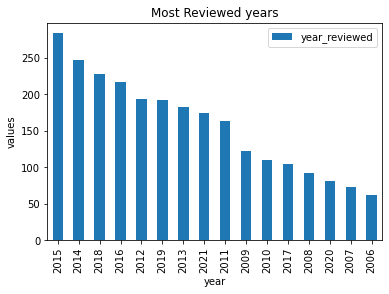

In [28]:
#plotting the graph for seeing the most reviewed years
year_df.plot(x="index",y="year_reviewed",kind="bar",xlabel="year",ylabel="values",title="Most Reviewed years")

#### Observation
From the above plot it is evedent that in 2015 most number of coca was reviewed and after that in 2014 its 2nd highest

In [29]:
#Seeing the top 10 most cocao beans origin places
beanOrigin_df=df.bean_origin.value_counts().reset_index().head(10)
beanOrigin_df

,index,bean_origin
0,Venezuela,253
1,Peru,244
2,Dominican Republic,226
3,Ecuador,219
4,Madagascar,177
5,Blend,156
6,Nicaragua,100
7,Bolivia,80
8,Tanzania,79
9,Colombia,79


<AxesSubplot:title={'center':'Plot for origin of cocoa beans'}, xlabel='Places', ylabel='values'>

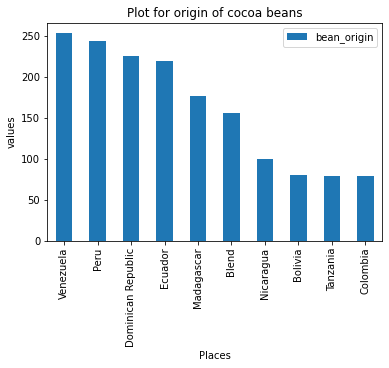

In [30]:
#plotting the graph for seeing the top 10 most cocao beans origin places
beanOrigin_df.plot(x="index",y="bean_origin",kind="bar",xlabel="Places",ylabel="values",title="Plot for origin of cocoa beans")

#### Observation 
From the above graph we see that out of the top places of cocoa origin VeneZuela is on topfollowed by Peru

In [31]:
#Creating a dataset to sort the dataset rating wise

reviewSort_df = df.sort_values(by='rating',ascending=False).reset_index().head(20)
reviewSort_df

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,bars_count
0,1829,1034,Patric,U.S.A.,2013,Peru,"Piura, Choc. Garage Exclusive",67.0,3.000000,"B,S,C","creamy, cocoa, grapes",4.0,2
1,575,2514,Chokola,U.S.A.,2020,Madagascar,"Bejofo, 2019 H., Batch 20",67.0,2.000000,"B,S","cherry, perfectly balanced roast",4.0,3
2,150,2254,Arete,U.S.A.,2018,Colombia,Tumaco,70.0,2.000000,"B,S","smooth, nutty, cocoa",4.0,1
3,2389,129,Valrhona,France,2007,Madagascar,Manjari,64.0,5.000000,"B,S,C,V,L","creamy, blueberry, raspberry",4.0,1
4,2047,336,Scharffen Berger,U.S.A.,2009,Ghana,Asante,65.0,5.000000,"B,S,C,V,L","simple, delicate cocoa, long",4.0,1
5,491,2688,Castronovo,U.S.A.,2021,Venezuela,"Chuao, batch 1089",72.0,3.000000,"B,S,C","mild strawberry, cocoa, acidic",4.0,2
6,490,2554,Castronovo,U.S.A.,2021,Peru,"Valle de Los Rios, batch 990",70.0,3.000000,"B,S,C","complex, strawberry, floral",4.0,2
7,2051,959,Scharffen Berger,U.S.A.,2012,Peru,San Juan de Cheni,78.0,4.000000,"B,S,C,L","banana, pear, spice, cheese",4.0,1
8,486,1724,Castronovo,U.S.A.,2016,Belize,"Maya Mtn, Batch 454, Heirloom",72.0,3.000000,"B,S,C","bright fruit, molasses, nutty",4.0,3
9,170,729,Artisan du Chocolat,U.K.,2011,Haiti,Haiti,72.0,3.000000,"B,S,C","nuts, butterscotch, brownie",4.0,1


<AxesSubplot:title={'center':'Bar plot for Manufacturer vs cocoa percent, rating and Ingridients number'}, xlabel='Manufacturer', ylabel='values'>

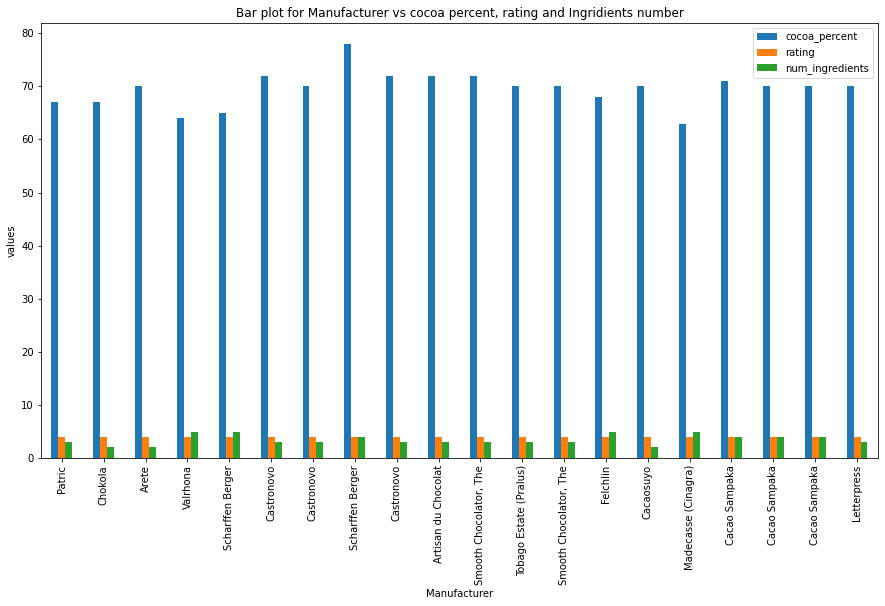

In [32]:
#plotting a bar graph to understand the Manufacturer vs cocoa percent, rating and Ingridients number
reviewSort_df.plot(x='manufacturer',y=['cocoa_percent','rating','num_ingredients'],kind='bar',
             figsize= (15,8),xlabel="Manufacturer",ylabel="values",
                   title="Bar plot for Manufacturer vs cocoa percent, rating and Ingridients number")



#### Observation 
We can deduce that the top 20 bars that are in the list according to the ratings are having a cocoa percentage of more than 65% but less than 72%
We can deduce that the top 20 bars that are in the list according to the ratings are having a number of ingrediants of more than 2 but less than or equal to 5
And the manufacturer with the highest Cocoa percent is Scharffen Berger	
Many Manufacturer have 5 ingredients

In [33]:
#creating a dataset to store the highest rated bars which has rating 4
FourRating_df=reviewSort_df[reviewSort_df['rating']==4]
FourRating_df

,index,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating,bars_count
0,1829,1034,Patric,U.S.A.,2013,Peru,"Piura, Choc. Garage Exclusive",67.0,3.000000,"B,S,C","creamy, cocoa, grapes",4.0,2
1,575,2514,Chokola,U.S.A.,2020,Madagascar,"Bejofo, 2019 H., Batch 20",67.0,2.000000,"B,S","cherry, perfectly balanced roast",4.0,3
2,150,2254,Arete,U.S.A.,2018,Colombia,Tumaco,70.0,2.000000,"B,S","smooth, nutty, cocoa",4.0,1
3,2389,129,Valrhona,France,2007,Madagascar,Manjari,64.0,5.000000,"B,S,C,V,L","creamy, blueberry, raspberry",4.0,1
4,2047,336,Scharffen Berger,U.S.A.,2009,Ghana,Asante,65.0,5.000000,"B,S,C,V,L","simple, delicate cocoa, long",4.0,1
5,491,2688,Castronovo,U.S.A.,2021,Venezuela,"Chuao, batch 1089",72.0,3.000000,"B,S,C","mild strawberry, cocoa, acidic",4.0,2
6,490,2554,Castronovo,U.S.A.,2021,Peru,"Valle de Los Rios, batch 990",70.0,3.000000,"B,S,C","complex, strawberry, floral",4.0,2
7,2051,959,Scharffen Berger,U.S.A.,2012,Peru,San Juan de Cheni,78.0,4.000000,"B,S,C,L","banana, pear, spice, cheese",4.0,1
8,486,1724,Castronovo,U.S.A.,2016,Belize,"Maya Mtn, Batch 454, Heirloom",72.0,3.000000,"B,S,C","bright fruit, molasses, nutty",4.0,3
9,170,729,Artisan du Chocolat,U.K.,2011,Haiti,Haiti,72.0,3.000000,"B,S,C","nuts, butterscotch, brownie",4.0,1


In [34]:
#seeing which bean origin places has the most number of manufacturers
dummy=FourRating_df.bean_origin.value_counts().reset_index()
dummy

,index,bean_origin
0,Peru,5
1,Madagascar,3
2,Ecuador,2
3,Mexico,2
4,Colombia,1
5,Ghana,1
6,Venezuela,1
7,Belize,1
8,Haiti,1
9,Tobago,1


<AxesSubplot:title={'center':' bean origin Countries with the higest rating'}, xlabel='index'>

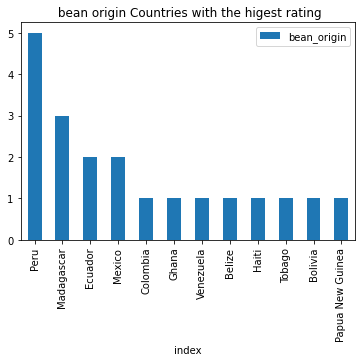

In [35]:
#plotting a graph for the places that give the higest rated beans
dummy.plot(x="index",y="bean_origin",kind="bar",title=" bean origin Countries with the higest rating")

#### Observation
We can see that All the countires in the bar have the highest rating while Peru has the most number of Manufacturers in the highest rating

In [40]:
#creating a dataset for storing the features
review_df=FourRating_df['review'].reset_index()
review_df

,index,review
0,0,"creamy, cocoa, grapes"
1,1,"cherry, perfectly balanced roast"
2,2,"smooth, nutty, cocoa"
3,3,"creamy, blueberry, raspberry"
4,4,"simple, delicate cocoa, long"
5,5,"mild strawberry, cocoa, acidic"
6,6,"complex, strawberry, floral"
7,7,"banana, pear, spice, cheese"
8,8,"bright fruit, molasses, nutty"
9,9,"nuts, butterscotch, brownie"


In [42]:
#seperating the features in each column row wise to give a detailed analysis
dum=(review_df.set_index(['index'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())
dum

,index,review
0,0,creamy
1,0,cocoa
2,0,grapes
3,1,cherry
4,1,perfectly balanced roast
5,2,smooth
6,2,nutty
7,2,cocoa
8,3,creamy
9,3,blueberry


In [47]:
#seeing which feature has occured most frequently
features=dum.review.value_counts().head(10).reset_index()
features

,index,review
0,cocoa,7
1,creamy,5
2,nutty,4
3,smooth,2
4,raspberry,2
5,floral,2
6,complex,2
7,peanut,1
8,brownie,1
9,pistachio,1


<AxesSubplot:title={'center':'The most highlighted features among the 4 rated Manufactures'}, xlabel='index'>

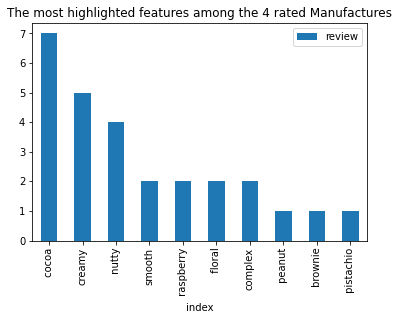

In [48]:
# plotting the graph for the most highlighted features 
features.plot(x="index",y="review",kind="bar",title="The most highlighted features among the 4 rated Manufactures")

#### Observation
The most prominent features are Cocao,creamy and nutty these are most prominent features amon the bars which are 4 rated

# Conclusion

The observation from the above data is that

1) USA has the most number of cocoa manufacturing companies

2) The most number of reviwes were done on 2015

3) Venezula had the most number of cocoa beans origined from their

4) We can deduce that the top 20 bars that are in the list according to the ratings are having a cocoa percentage of more than 65% but less than 72%

5) We can deduce that the top 20 bars that are in the list according to the ratings are having a number of ingrediants of more than 2 but less than or equal to 5
 
6) And the manufacturer with the highest Cocoa percent is Scharffen Bergerwith 4 rating

7) Many Manufacturer have 5 ingredients who have ratings as 4

8) Peru,Madagascar,Ecuador,Mexico,Colombia,Ghana,Venezuela,Belize,Haiti,Tobago,Bolivia,Papua New Guinea these are the countries with 4 rating

9) The most prominent features are Cocao,creamy and nutty these are most prominent features amon the bars which are 4 rated